# 2022-01-07 Looking closer at various model parameterisations for the most successful models

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/c8000b66f12ad3a82be10ac9066d0498e0a750e1 (Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

Following up on a couple of things from yesterday's notes (2022-01-05b), I have:
* Corrected a plotting bug that caused most of the spikes I was noting at high values in the parameter histograms.
* Added a bit of jitter to the parameter plots, and changed it so the within-full-model-listing parameter plots below show only the parameterisations meeting all four main criteria (previously I tried to make scatters per criterion, which made them basically illegible).
* I also found a bug in `do_2...` which only retained parameterisations meeting exactly three criteria. Now retaining parameterisations meeting three criteria or more, as intended.

See further below for discussion and various further analyses. The overall takeaways are:
* All seems fine for proceeding along the rest of the modelling pipeline.
* Getting a pedestrian to cross in front of a still yielding vehicle remains challenging once the vehicle has come close.

## Overall results and parameter scatters

['C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVA.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAa.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEc.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEcoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEcoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEcoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEcoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/resu

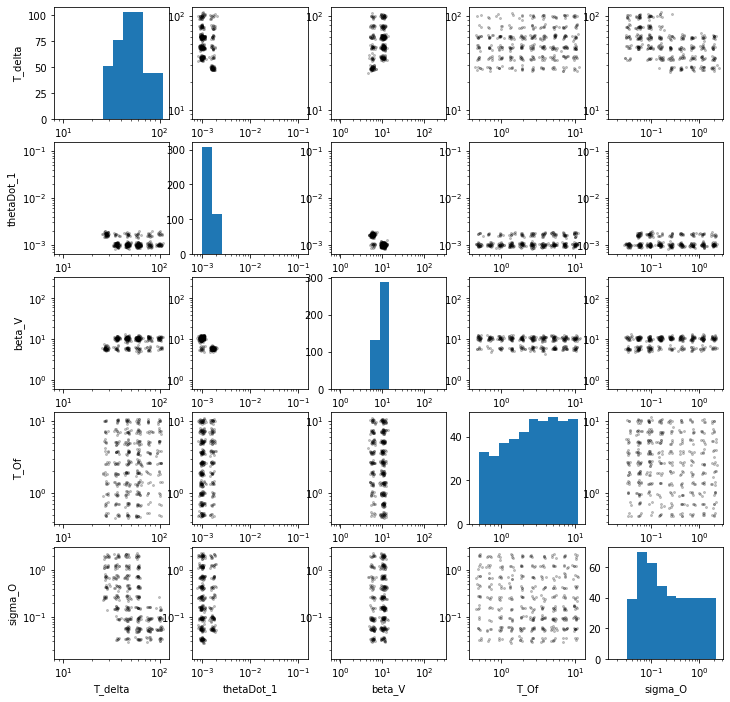


Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVAaoVAloBEv.pkl"...
	Done.
Analysing model oVAaoVAloBEv, 1000 parameterisations...
	Main criteria:
		Vehicle asserting priority: Found 0 (0.0 %) parameterisations.
		Vehicle short-stopping: Found 116 (11.6 %) parameterisations.
		Pedestrian hesitation in deceleration scenario: Found 110 (11.0 %) parameterisations.
		Pedestrian starting before vehicle at full stop: Found 172 (17.2 %) parameterisations.
	Secondary criteria:
		Pedestrian hesitation in constant-speed scenario: Found 10 (1.0 %) parameterisations.
	All main criteria met: Found 0 (0.0 %) parameterisations.
	Max no of main criteria met was 3, for 9 parameterisations.
		Out of these, the max number of secondary criteria met was 0, for 9 parameterisations.
	NaNs in main crit: [0 0 0 0]; sec crit: [0]

Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVAaoVAloBEvoAI.pkl"...
	Done.
Analysing model oVAa

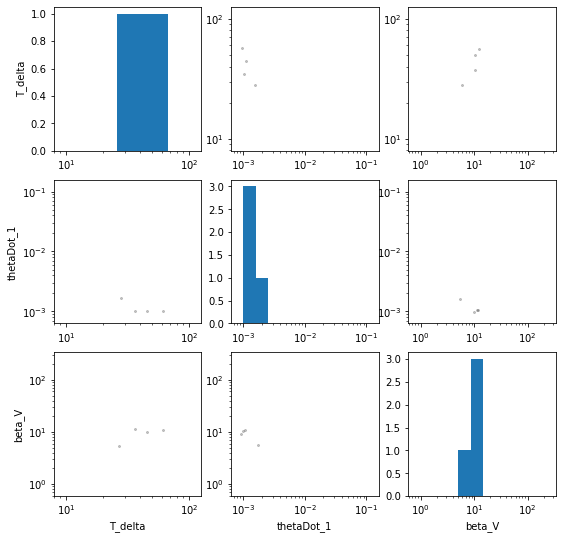


Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVAoBEo.pkl"...
	Done.
Analysing model oVAoBEo, 1000 parameterisations...
	Main criteria:
		Vehicle asserting priority: Found 0 (0.0 %) parameterisations.
		Vehicle short-stopping: Found 1000 (100.0 %) parameterisations.
		Pedestrian hesitation in deceleration scenario: Found 1000 (100.0 %) parameterisations.
		Pedestrian starting before vehicle at full stop: Found 0 (0.0 %) parameterisations.
	Secondary criteria:
		Pedestrian hesitation in constant-speed scenario: Found 0 (0.0 %) parameterisations.
	All main criteria met: Found 0 (0.0 %) parameterisations.
	Max no of main criteria met was 2, for 1000 parameterisations.
		Out of these, the max number of secondary criteria met was 0, for 1000 parameterisations.
	NaNs in main crit: [0 0 0 0]; sec crit: [0]

Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVAoBEooBEv.pkl"...
	Done.
Analysing model oVAoBEooBEv,

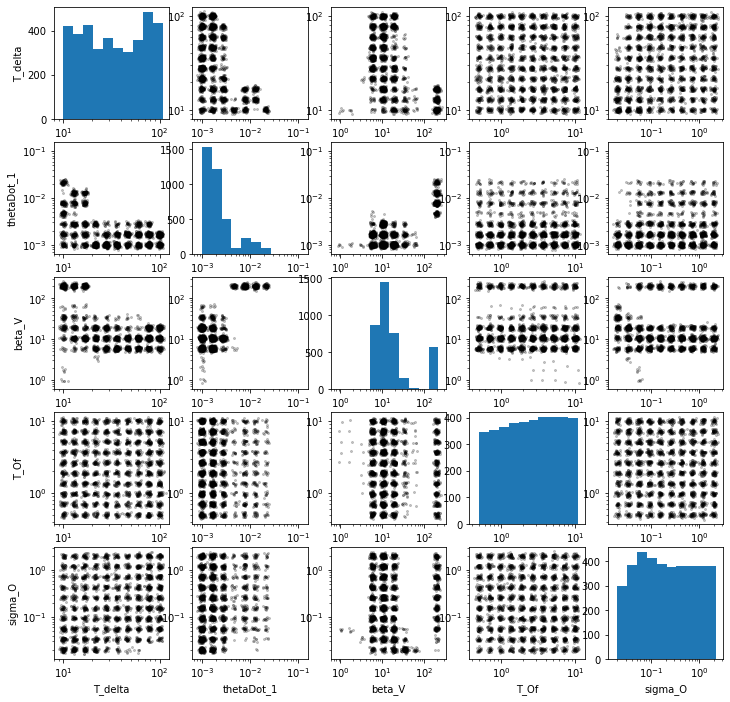


***********************

Model oVAaoVAloBEvoAI
Retaining 38 out of 1000 (3.8 %) parameterisations meeting at least 3 main criteria, across:
('T_delta', 'thetaDot_1', 'beta_V')


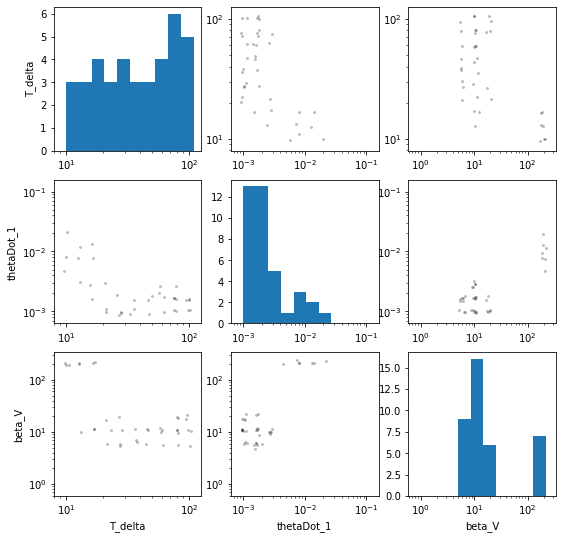


***********************


In [1]:
%run ../SCPaper/do_2_analyse_deterministic_fits

## Spikes at high values in parameter histograms

As mentioned, most of this was due to a plotting bug, there is still a spike at $\beta_V$ = 200 in the retained parameterisations (histograms at the bottom above).

Below listing the retained parameterisations for `oVAaoVAloBEvoAI` together with the main criteria met for each. From that table it's clear that the spike at $\beta_V$ = 200 in the histograms above is due to a set of parameterisations for which priority assertion criterion is never met, but the other three always are. For this set of parameterisations, $T_\delta$ is noticeably lower and $\dot{\theta}_1$ is noticeably higher than for the other retained parameterisations (this is now also easy to see from the improved scatters above). Not necessarily anything wrong about this, just seems to be tapping into another subregion of the parameter space which meets these three specific criteria - and if I had tested higher values of $\beta_V$ I would probably have found more of this. Also running simulations for one of these parameterisations further below to further verify that nothing weird is going on - and it looks fine I think. Just very quick bang-bang oscillations in the behaviour probabilities, as one would expect with high $\beta_V$. 

In [41]:
import pandas as pd
det_fit = det_fits['oVAaoVAloBEvoAI']
idx_retained = np.nonzero(det_fit.n_main_criteria_met >= N_MAIN_CRIT_FOR_RETAINING)[0]
print('Below abbreviating the main critera: ' + str(CRITERIA[i_MAIN]) + '\n')
info_cols = tuple(n[8:15] for n in CRITERIA[i_MAIN]) + det_fit.param_names
retained_info = (np.concatenate((det_fit.main_criteria_matrix.T[idx_retained,:], det_fit.results.params_matrix[idx_retained,:]), axis=1))
df = pd.DataFrame(data = retained_info, columns=info_cols)
print(df)

Below abbreviating the main critera: ('Vehicle asserting priority', 'Vehicle short-stopping', 'Pedestrian hesitation in deceleration scenario', 'Pedestrian starting before vehicle at full stop')

    asserti  short-s  an hesi  an star     T_delta  thetaDot_1      beta_V
0       1.0      0.0      1.0      1.0   21.544347    0.001000    5.848035
1       1.0      0.0      1.0      1.0   27.825594    0.001000    5.848035
2       1.0      0.0      1.0      1.0   35.938137    0.001000    5.848035
3       1.0      1.0      1.0      1.0   27.825594    0.001668    5.848035
4       1.0      1.0      0.0      1.0   35.938137    0.001668    5.848035
5       1.0      1.0      0.0      1.0   46.415888    0.001668    5.848035
6       1.0      1.0      0.0      1.0   59.948425    0.001668    5.848035
7       1.0      1.0      0.0      1.0   77.426368    0.001668    5.848035
8       1.0      1.0      0.0      1.0  100.000000    0.001668    5.848035
9       0.0      1.0      1.0      1.0   27.825594    

Plotting model oVAaoVAloBEvoAI with params {'T_delta': 16.681005, 'thetaDot_1': 0.007743, 'beta_V': 200}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


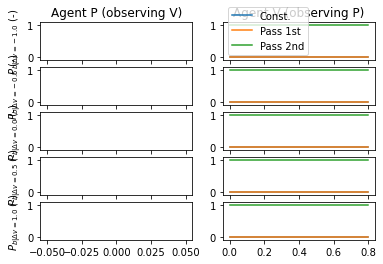

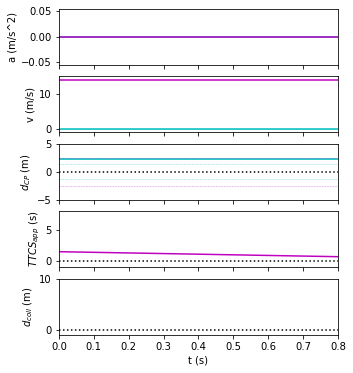

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


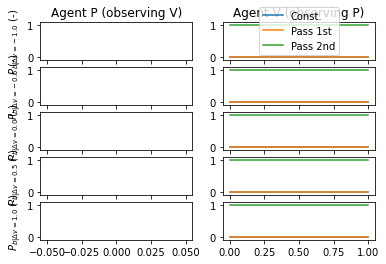

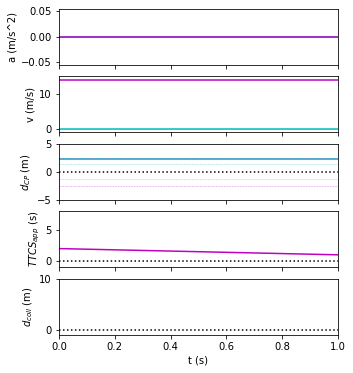

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


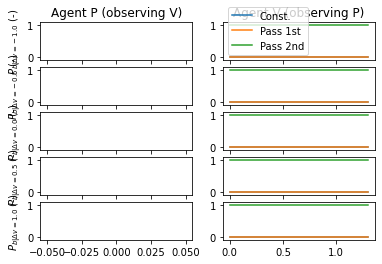

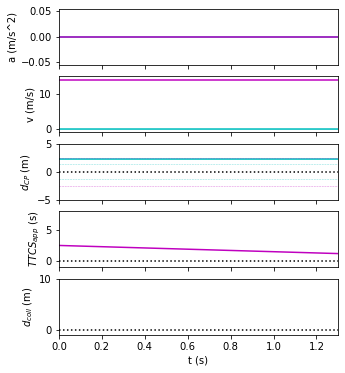

Metric VehPrioAssert_veh_av_speed = 13.888888888888888


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


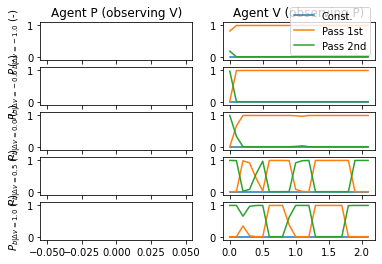

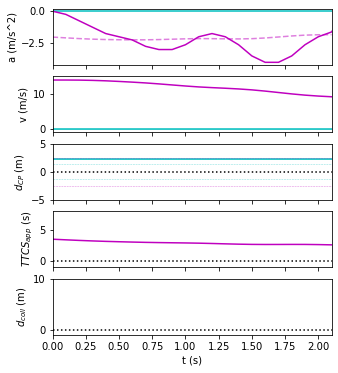

Metric VehShortStop_veh_av_surpl_dec = 0.6685633860761933


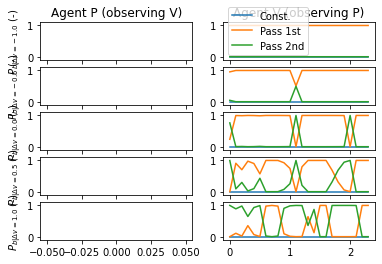

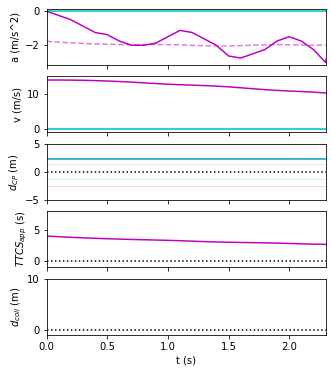

Metric VehShortStop_veh_av_surpl_dec = -0.07647500156492726


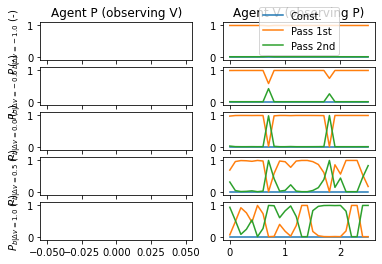

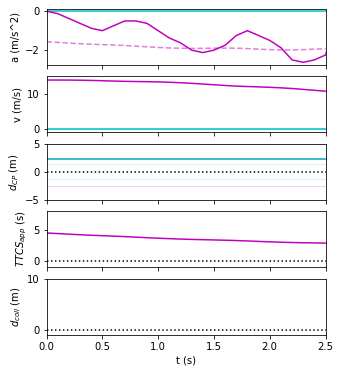

Metric VehShortStop_veh_av_surpl_dec = -0.3827451780091649


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


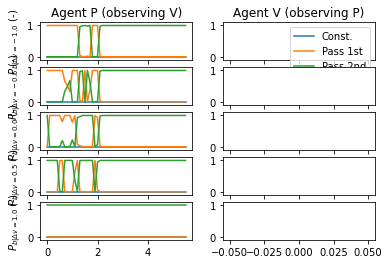

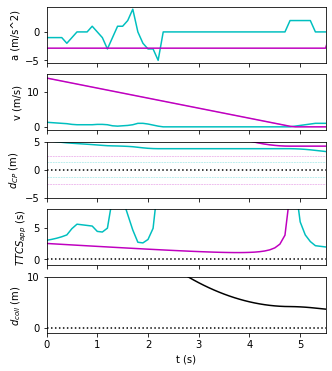

Metric PedHesitateVehYield_ped_av_speed = 0.3618181818181818


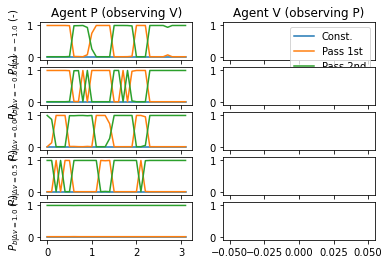

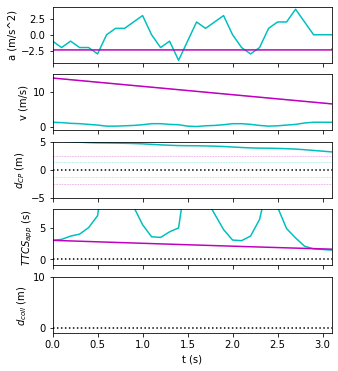

Metric PedHesitateVehYield_ped_av_speed = 0.6548387096774194


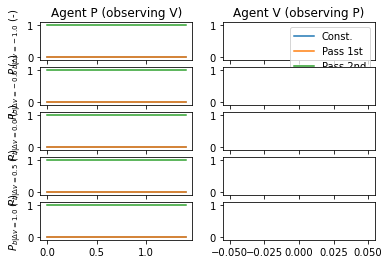

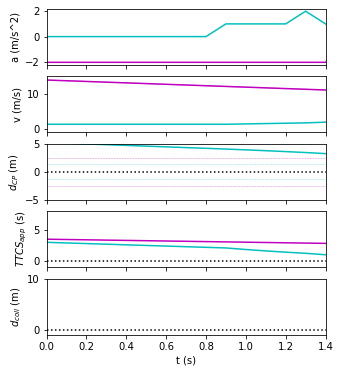

Metric PedHesitateVehYield_ped_av_speed = 1.3714285714285717


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


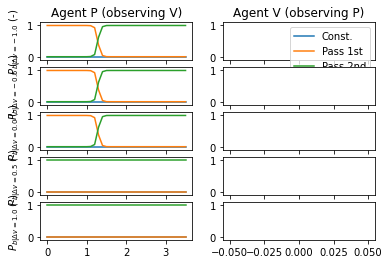

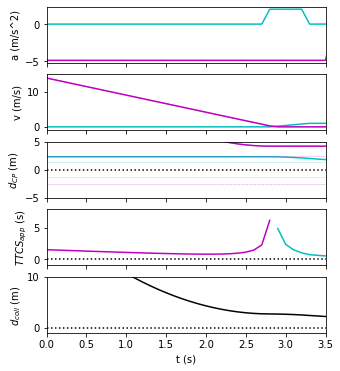

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


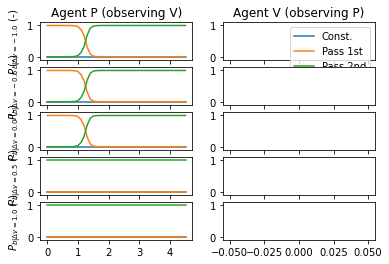

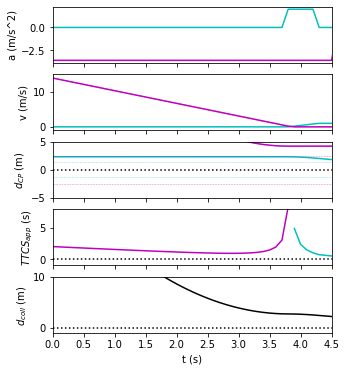

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


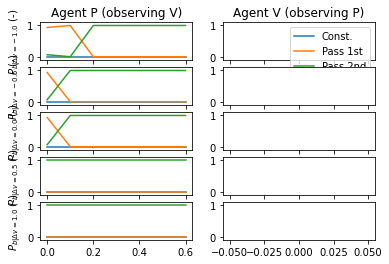

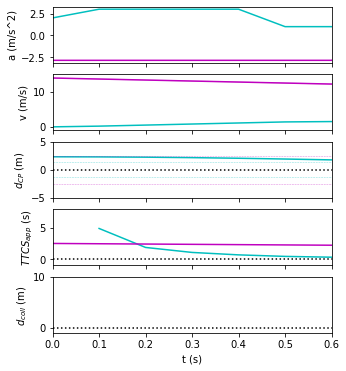

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517


In [42]:
def simulate_all(det_fit, params):
    params_dict = det_fit.get_params_dict(params)
    det_fit.set_params(params_dict)
    print(f'Plotting model {det_fit.name} with params {params_dict}:')
    for scenario in det_fit.scenarios.values():
        if scenario.name == 'PedHesitateVehConst':
            continue
        print(f'\n\n\t\tScenario "{scenario.name}"')
        sc_simulations = det_fit.simulate_scenario(scenario)
        be_plots = 'oBE' in det_fit.name
        for sim in sc_simulations:
            sim.do_plots(kinem_states=True, 
                         veh_stop_dec=(scenario.name == 'VehShortStop'), 
                         beh_probs=be_plots)
            sc_fitting.get_metrics_for_scenario(scenario, sim, verbose=True)

simulate_all(det_fit, (16.681005, 0.007743, 200))

## Flat distributions of `oBEo` parameters

### Parameterisations for non-`oBEo` and `oBEo` models are non-overlapping

Looking at how different or similar the parameterisations are for the models which achieved all criteria with and without `oBEo`:

In [37]:
model = 'oVAaoVAloBEvoAI'
print(f'*** {model} ***')
det_fit = det_fits[model]
idx_all_met = np.nonzero(det_fit.n_main_criteria_met == len(CRITERIA[i_MAIN]))[0]
print('Parameterisations meeting all criteria:')
df = pd.DataFrame(data=det_fit.results.params_matrix[idx_all_met,:], columns=det_fit.param_names)
print(df)

model = 'oVAaoVAloBEooBEvoAI'
print(f'\n\n*** {model} ***')
det_fit = det_fits[model]
idx_all_met = np.nonzero(det_fit.n_main_criteria_met == len(CRITERIA[i_MAIN]))[0]
idx_sigma_O = det_fit.param_names.index('sigma_O')
idx_T_Of = det_fit.param_names.index('T_Of')
min_sigma_O = np.amin(det_fit.results.params_matrix[idx_all_met, idx_sigma_O])
print(f'Min sigma_O in parameterisations meeting all criteria is {min_sigma_O} m.\n')

idx_interesting = np.nonzero((det_fit.n_main_criteria_met == len(CRITERIA[i_MAIN]))
                            & (det_fit.results.params_matrix[:,idx_sigma_O] == min_sigma_O)
                            & (det_fit.results.params_matrix[:,idx_T_Of] == 10))[0]
print('Parameterisations meeting all criteria, with min sigma_O, and T_Of = 10 s:')
df = pd.DataFrame(data=det_fit.results.params_matrix[idx_interesting,:], columns=det_fit.param_names)
print(df)

*** oVAaoVAloBEvoAI ***
Parameterisations meeting all criteria:
     T_delta  thetaDot_1     beta_V
0  27.825594    0.001668   5.848035
1  35.938137    0.001000  10.536103
2  46.415888    0.001000  10.536103
3  59.948425    0.001000  10.536103


*** oVAaoVAloBEooBEvoAI ***
Min sigma_O in parameterisations meeting all criteria is 0.033362010744001185 m.

Parameterisations meeting all criteria, with min sigma_O, and T_Of = 10 s:
      T_delta  thetaDot_1     beta_V  T_Of   sigma_O
0   46.415888       0.001   5.848035  10.0  0.033362
1   77.426368       0.001  10.536103  10.0  0.033362
2  100.000000       0.001  10.536103  10.0  0.033362


We can see above that there is no exaxt overlap in the non-`oBEo` parameters, which is sort of satisfying, because if there had been then that would have meant that I included `oBEo` parameterisations which were completely non-effective. Below plotting simulations for the two parameterisations which seems closest to each other, differing only by a smaller $\beta_V$ for the model with `oBEo`, which is actually opposite to what I was expecting, because I was guessing that since the model could achieve all criteria without `oBEo`, it might counteract its inclusion by increasing `beta_V` and thus outcompete the `oBEo` functionality with the `oBEv` functionality. This does not seem to be the case. Instead, we can see from the plots below that the main difference when introducing `oBEo` is that the behaviour probabilities become a bit less "jumpy", and converge to the correct belief quite quickly.

### Plots of non-`oBEo` and `oBEo` models

Plotting model oVAaoVAloBEvoAI with params {'T_delta': 46.415888, 'thetaDot_1': 0.001, 'beta_V': 10.536103}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


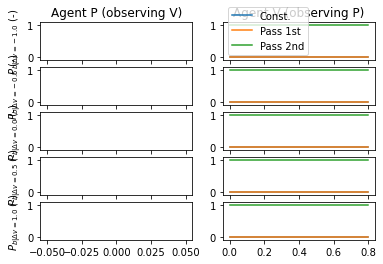

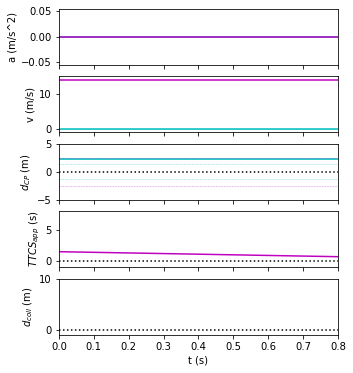

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


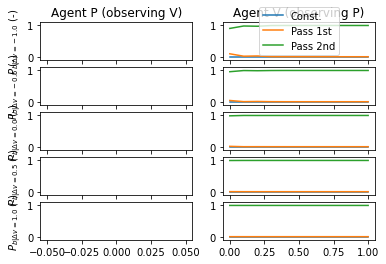

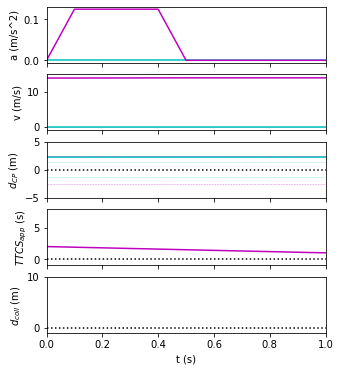

Metric VehPrioAssert_veh_av_speed = 13.921388888888888


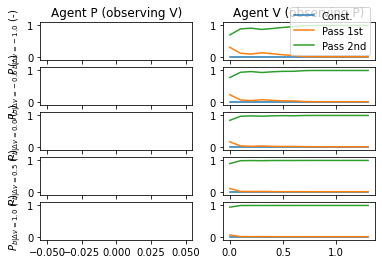

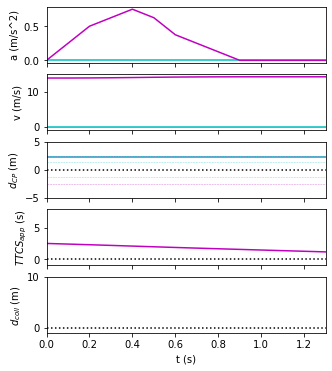

Metric VehPrioAssert_veh_av_speed = 14.102350427350425


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


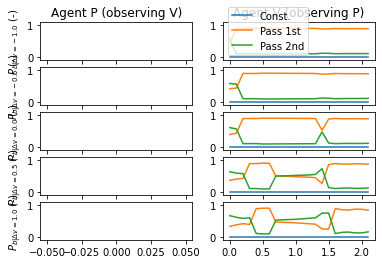

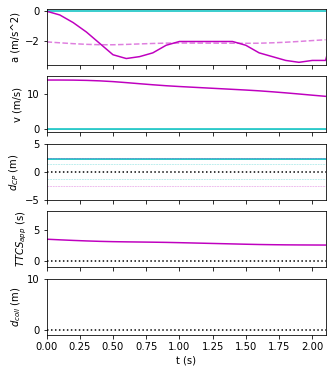

Metric VehShortStop_veh_av_surpl_dec = 0.5036805602337374


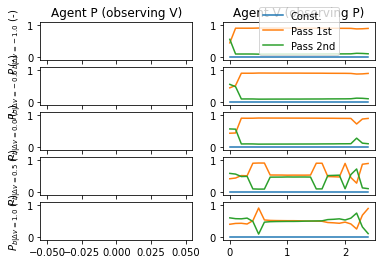

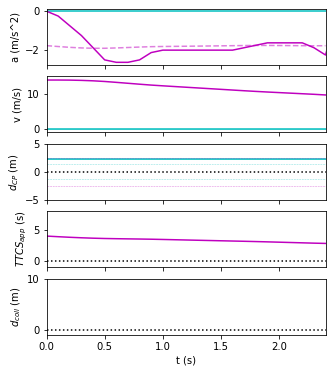

Metric VehShortStop_veh_av_surpl_dec = 0.19765579174298978


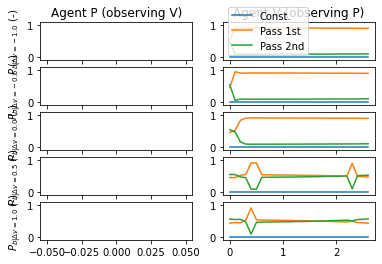

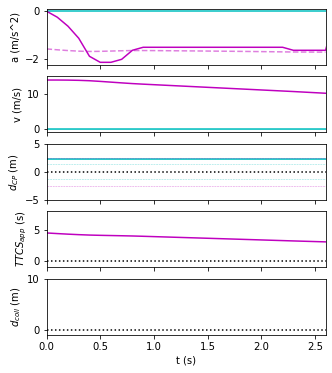

Metric VehShortStop_veh_av_surpl_dec = -0.0826249816644459


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


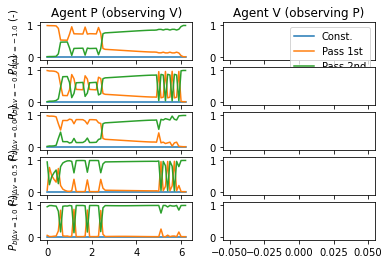

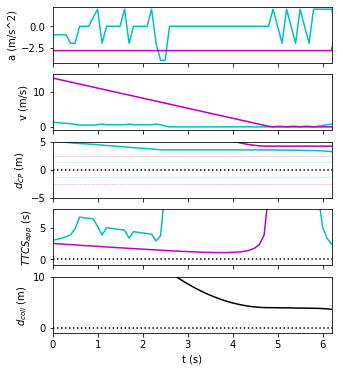

Metric PedHesitateVehYield_ped_av_speed = 0.3290322580645161


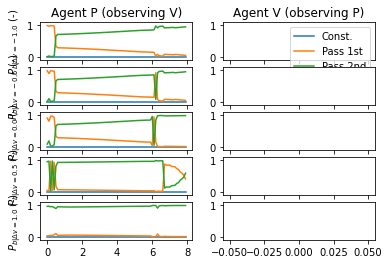

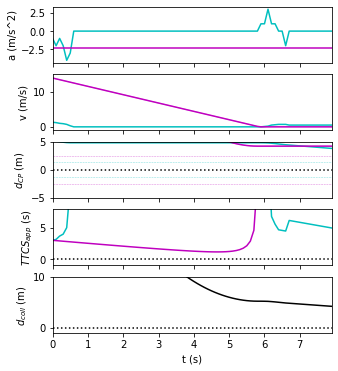

Metric PedHesitateVehYield_ped_av_speed = nan


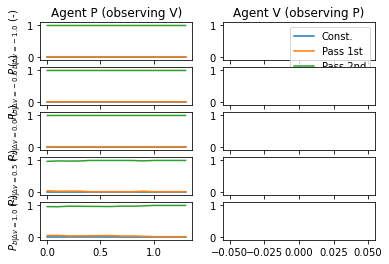

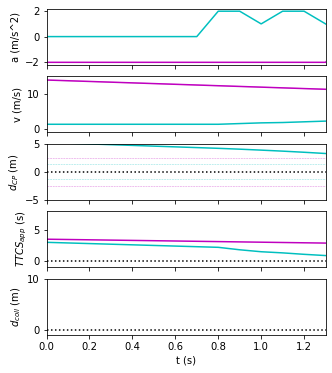

Metric PedHesitateVehYield_ped_av_speed = 1.4384615384615385


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


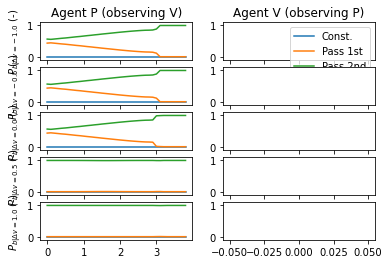

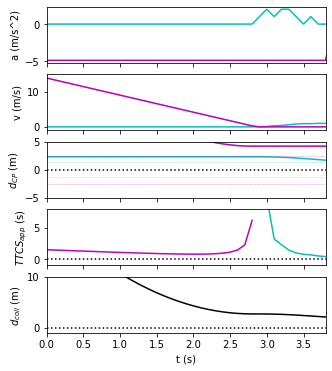

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


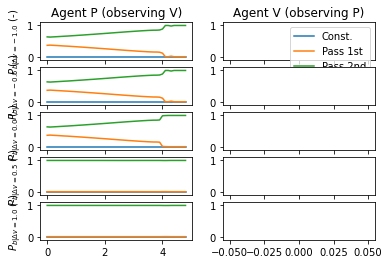

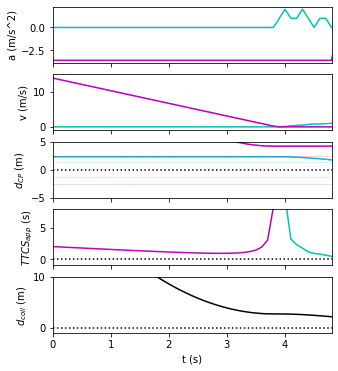

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


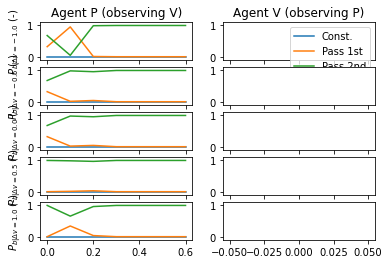

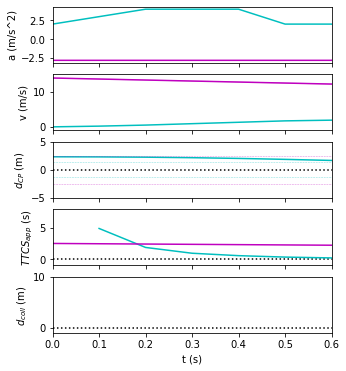

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517

****************

Plotting model oVAaoVAloBEooBEvoAI with params {'T_delta': 46.415888, 'thetaDot_1': 0.001, 'beta_V': 5.848035, 'T_Of': 10.0, 'sigma_O': 0.033362}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


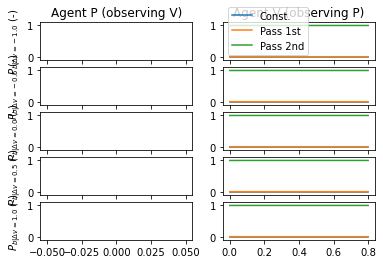

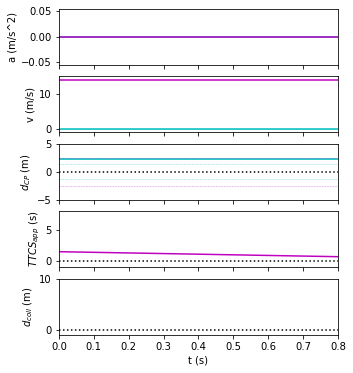

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


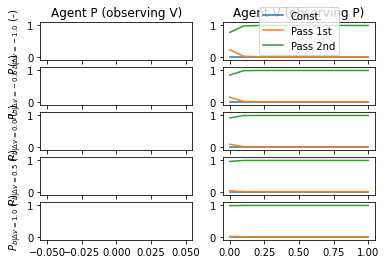

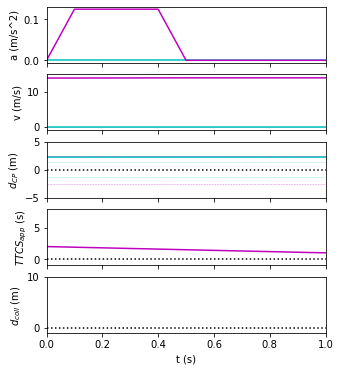

Metric VehPrioAssert_veh_av_speed = 13.921388888888888


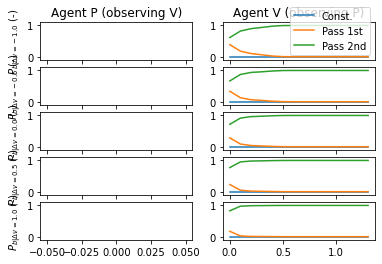

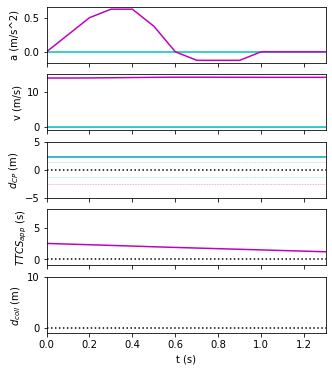

Metric VehPrioAssert_veh_av_speed = 14.038888888888891


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


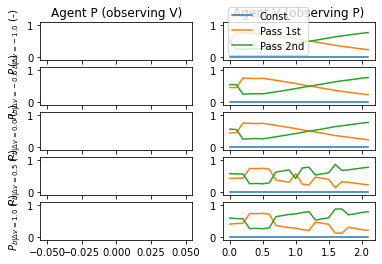

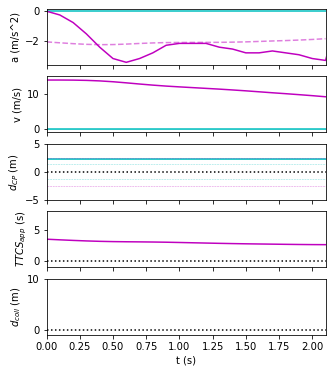

Metric VehShortStop_veh_av_surpl_dec = 0.6115379082658243


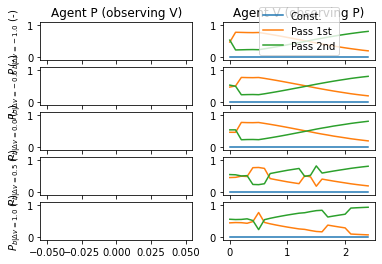

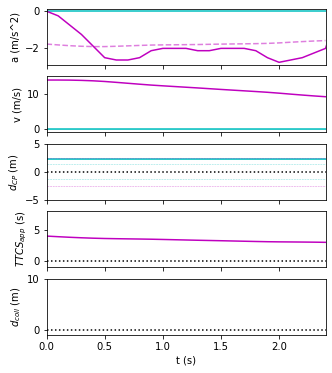

Metric VehShortStop_veh_av_surpl_dec = 0.5049770439065747


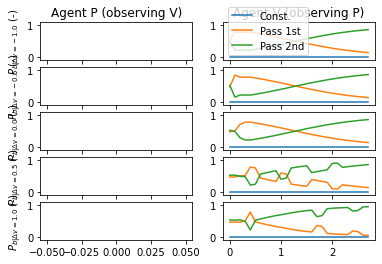

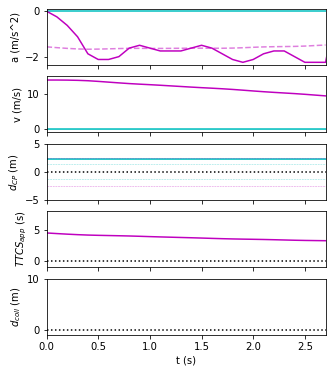

Metric VehShortStop_veh_av_surpl_dec = 0.2564133210745675


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


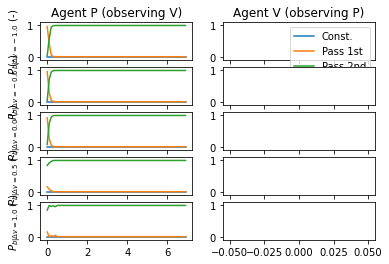

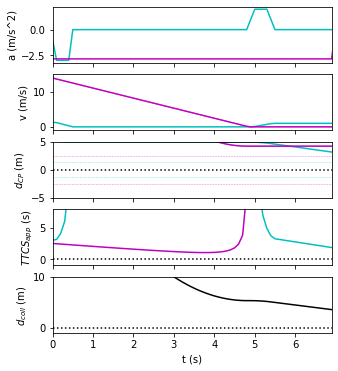

Metric PedHesitateVehYield_ped_av_speed = 0.3014492753623188


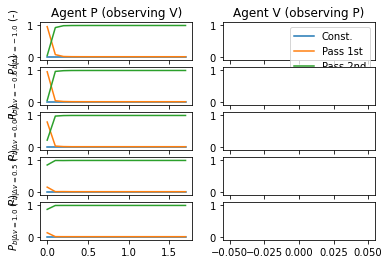

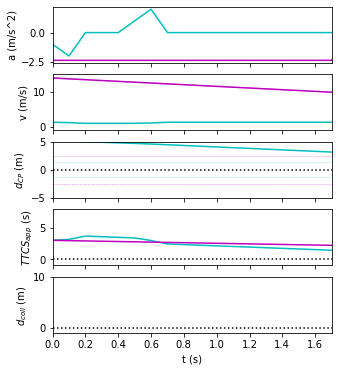

Metric PedHesitateVehYield_ped_av_speed = 1.2117647058823529


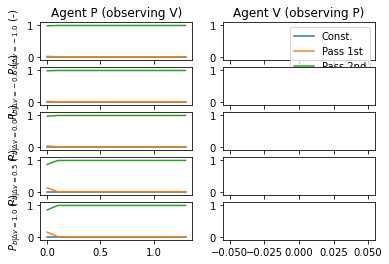

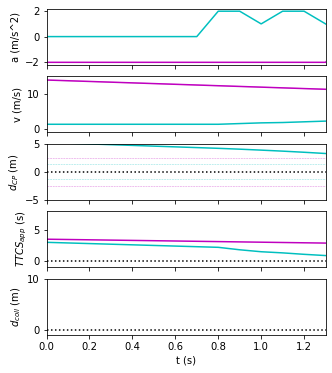

Metric PedHesitateVehYield_ped_av_speed = 1.4384615384615385


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


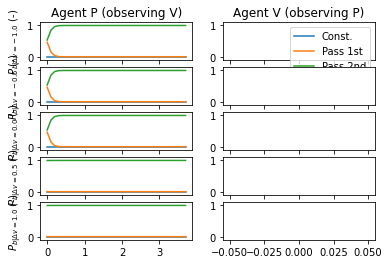

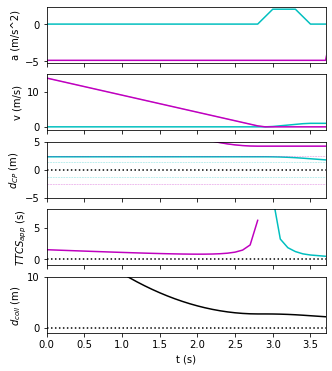

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


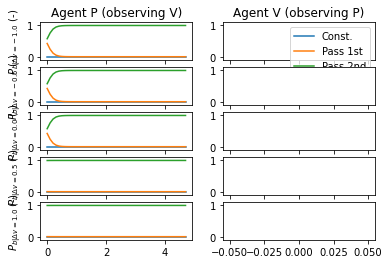

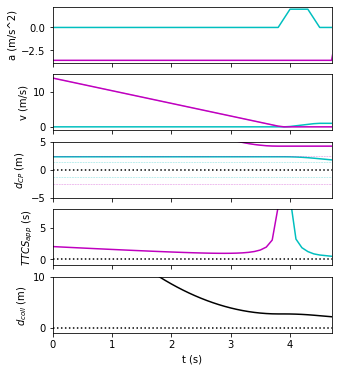

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


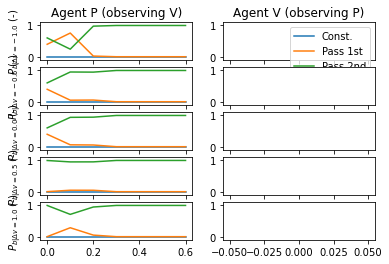

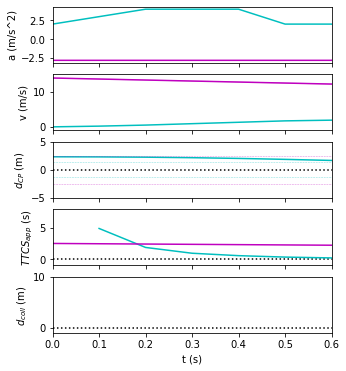

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517


In [43]:
simulate_all(det_fits['oVAaoVAloBEvoAI'], (46.415888, 0.001000, 10.536103))
print('\n****************\n')
simulate_all(det_fits['oVAaoVAloBEooBEvoAI'], (46.415888, 0.001, 5.848035, 10.0, 0.033362))

### Enabling `oBEo` can stop the model from exhibiting priority assertion

Out of interest, below I am increasing $\beta_V$ to the value it had for the non-`oBEo` parameterisation, and we can see that it now just barely fails the prio assertion criterion, which requires reaching a speed of 13.89 * 1.01 = 14.04 m/s. It is logical that the model can be less priority-asserting with `oBEo` enabled, because the vehicle can now observe that the pedestrian isn't moving, thus quickly increasing the pedestrian-passing-second belief to high values.

In [55]:
det_fit = det_fits['oVAaoVAloBEooBEvoAI']
params = np.array((46.415888, 0.001, 10.536103, 10.0, 0.033362))
idx_param = np.argmin(np.linalg.norm(det_fit.results.params_matrix - params, axis=1))
print(dict(zip(CRITERIA[i_MAIN], det_fit.main_criteria_matrix[:,idx_param])))

{'Vehicle asserting priority': False, 'Vehicle short-stopping': True, 'Pedestrian hesitation in deceleration scenario': True, 'Pedestrian starting before vehicle at full stop': True}


Plotting model oVAaoVAloBEooBEvoAI with params {'T_delta': 46.415888, 'thetaDot_1': 0.001, 'beta_V': 10.536103, 'T_Of': 10.0, 'sigma_O': 0.033362}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


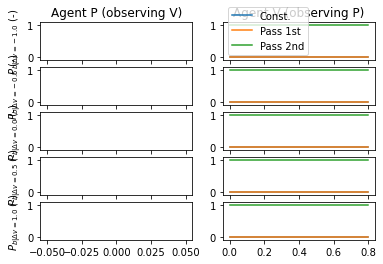

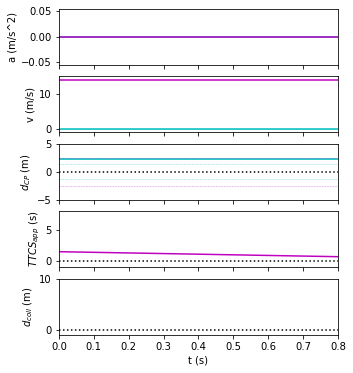

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


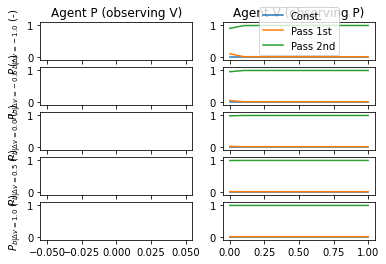

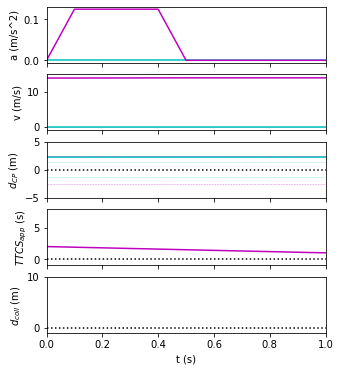

Metric VehPrioAssert_veh_av_speed = 13.921388888888888


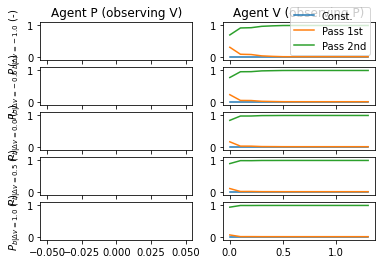

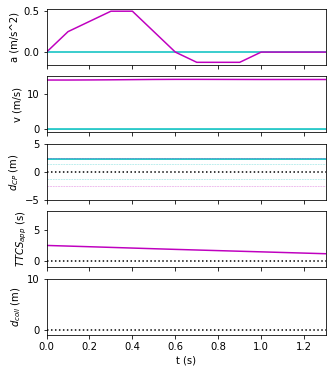

Metric VehPrioAssert_veh_av_speed = 14.006196581196583


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


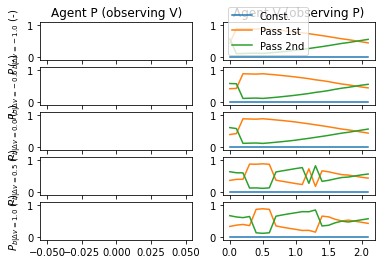

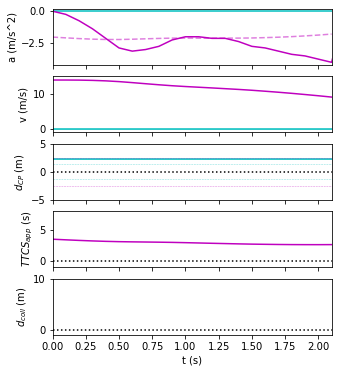

Metric VehShortStop_veh_av_surpl_dec = 0.6674091595301431


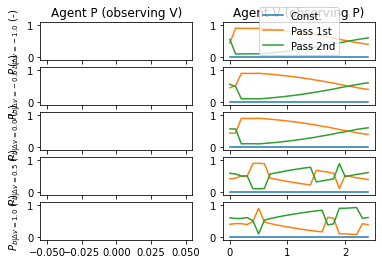

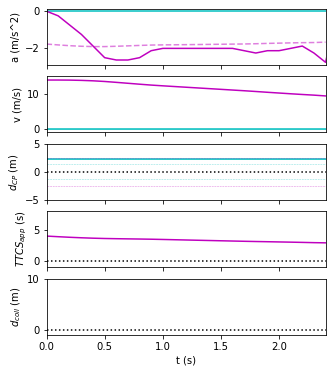

Metric VehShortStop_veh_av_surpl_dec = 0.367591277571939


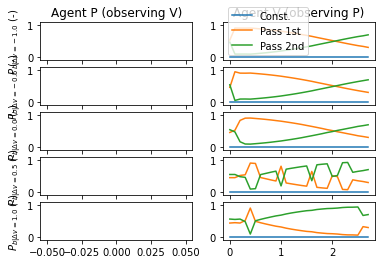

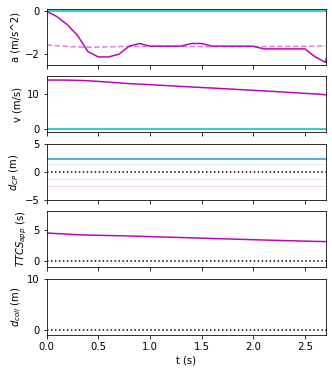

Metric VehShortStop_veh_av_surpl_dec = 0.06116201752026348


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


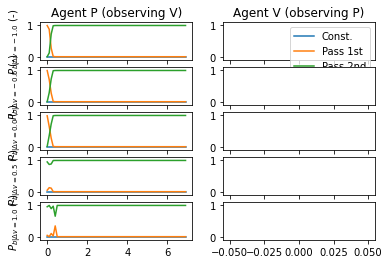

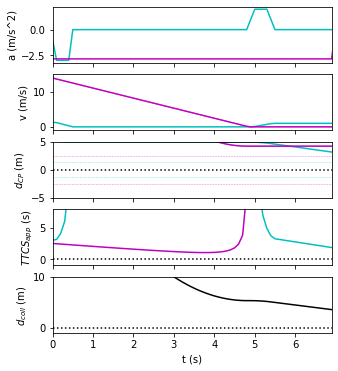

Metric PedHesitateVehYield_ped_av_speed = 0.3014492753623188


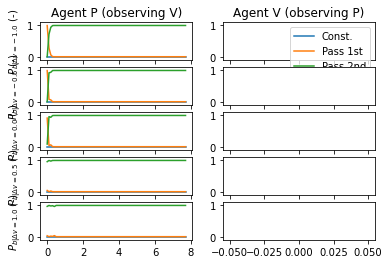

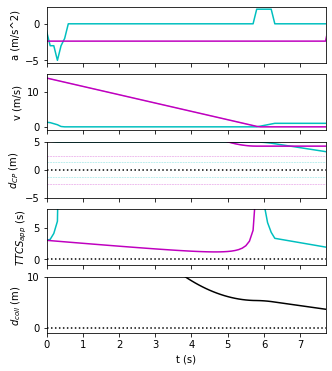

Metric PedHesitateVehYield_ped_av_speed = 0.26103896103896107


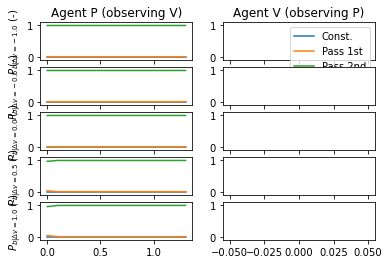

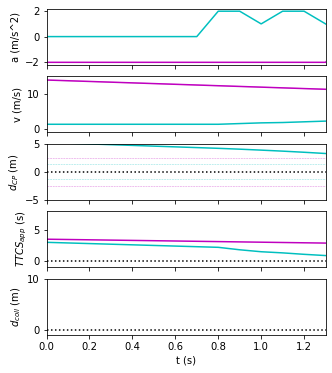

Metric PedHesitateVehYield_ped_av_speed = 1.4384615384615385


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


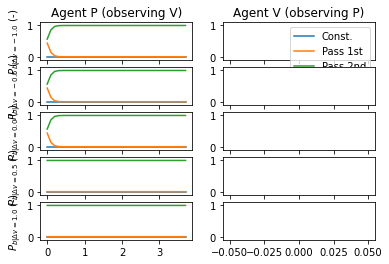

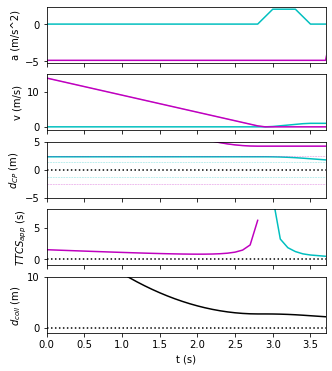

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


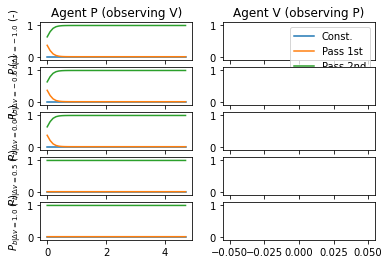

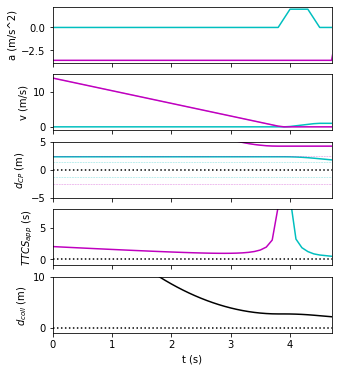

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


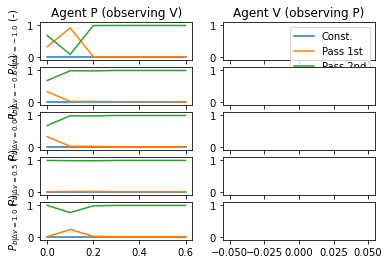

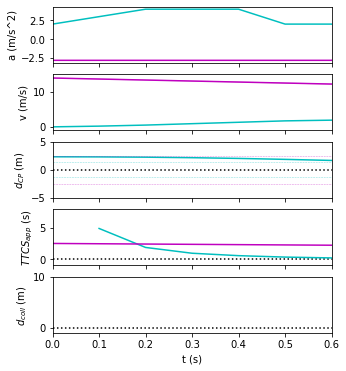

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517


In [56]:
simulate_all(det_fit, params)

### It is still difficult to get early pedestrian starts when the vehicle is close

I have noticed previously that the way the best models currently achieve the "early pedestrian start" criterion is by crossing very early in the scenario variation where the vehicle is the furthest away. The `oBE*` assumption still plays a role, and the pure `oVA` model does not cross early in this case, so in this sense all is ok, but it does not look quite like the crossings in the HIKER data, where pedestrians sometimes cross when the vehicle is close to zero speed but not quite at zero speed. This can be seen clearly in the histogram below. 

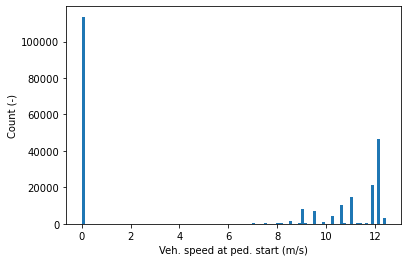

In [66]:
import matplotlib.pyplot as plt
det_fit = det_fits['oVAaoVAloBEooBEvoAI']
veh_speed_at_ped_start = det_fit.get_metric_results('PedCrossVehYield_veh_speed_at_ped_start')
plt.hist(veh_speed_at_ped_start.reshape(-1, 1), bins=100)
plt.xlabel('Veh. speed at ped. start (m/s)')
plt.ylabel('Count (-)')
plt.show()

Below are also some simulations for some parameterisations that could have been promising in theory, with higher $\dot{\theta}_1$ values, yet still achieving three of the main criteria (I have picked these parameterisations by looking at the parameter scatters for retained parameterisations under "Overall results and parameter scatters" above in this notebook. However, at least with these $\dot{\theta}_1$ and these scenario kinematics, it apparently still looks too scary (too much looming) to cross in front of the vehicle when it is close. It will be interesting to see what happens with these models when tested on the HIKER scenarios.

Plotting model oVAaoVAloBEooBEvoAI with params {'T_delta': 40, 'thetaDot_1': 0.003, 'beta_V': 10, 'T_Of': 10, 'sigma_O': 0.05}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


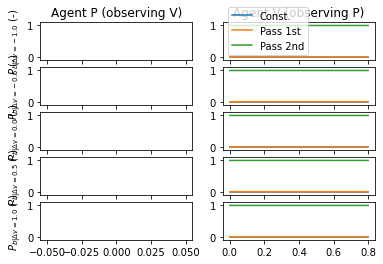

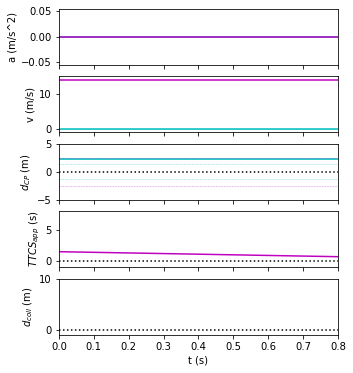

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


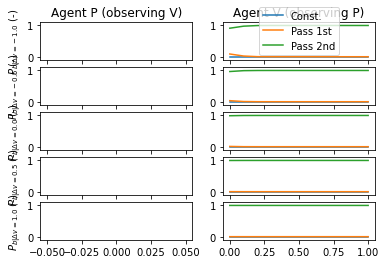

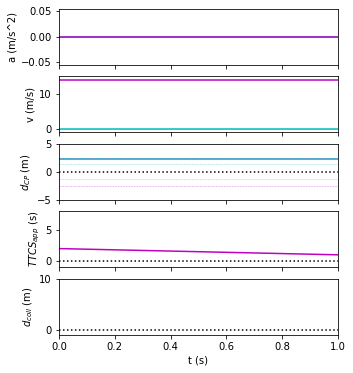

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


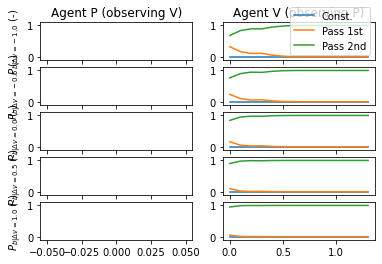

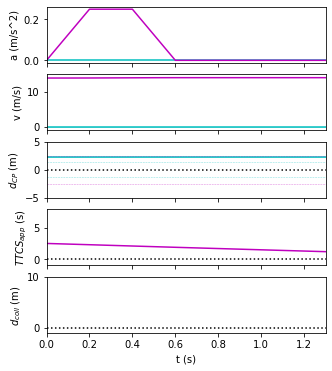

Metric VehPrioAssert_veh_av_speed = 13.958119658119655


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


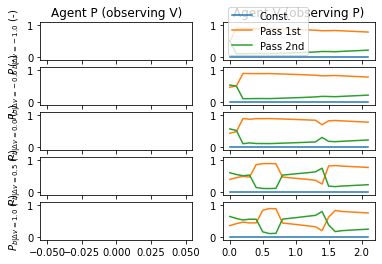

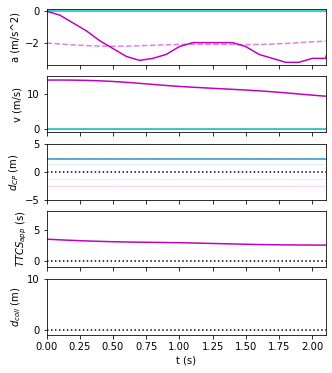

Metric VehShortStop_veh_av_surpl_dec = 0.5247373883503461


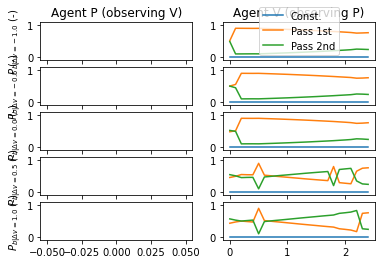

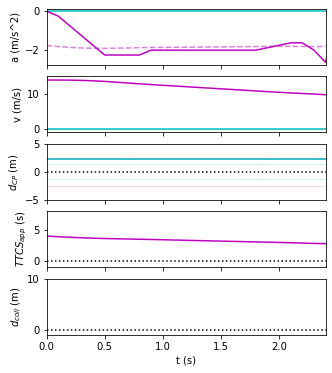

Metric VehShortStop_veh_av_surpl_dec = 0.13978203193620609


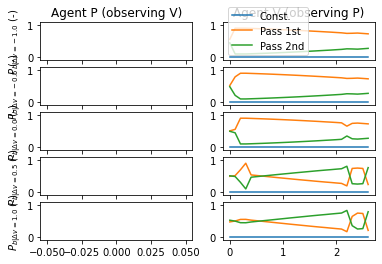

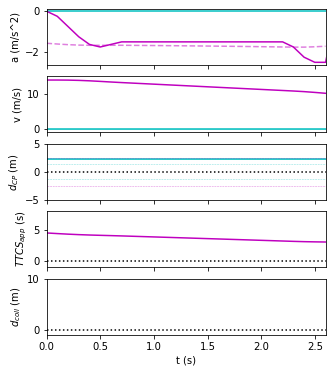

Metric VehShortStop_veh_av_surpl_dec = -0.10317956227953987


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


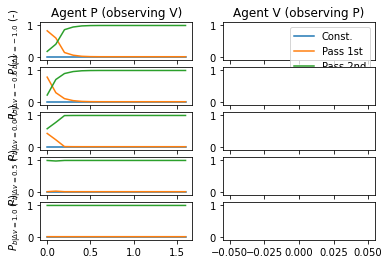

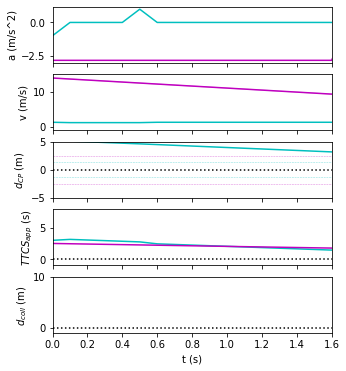

Metric PedHesitateVehYield_ped_av_speed = 1.2687499999999998


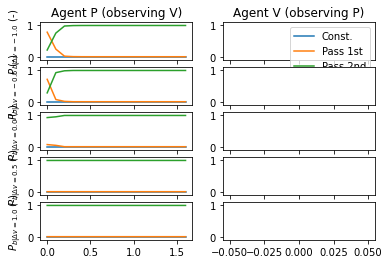

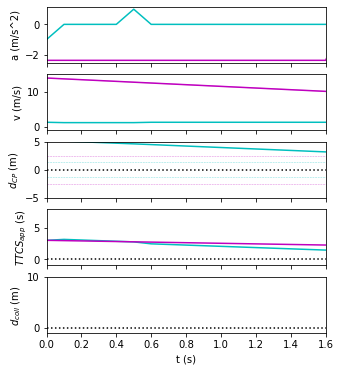

Metric PedHesitateVehYield_ped_av_speed = 1.2687499999999998


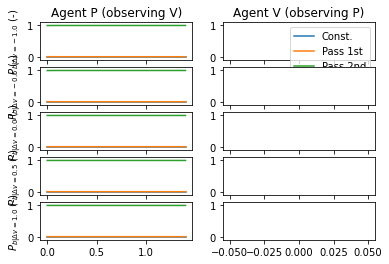

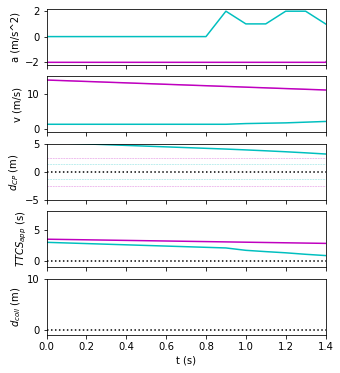

Metric PedHesitateVehYield_ped_av_speed = 1.407142857142857


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


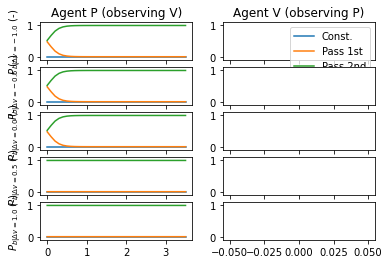

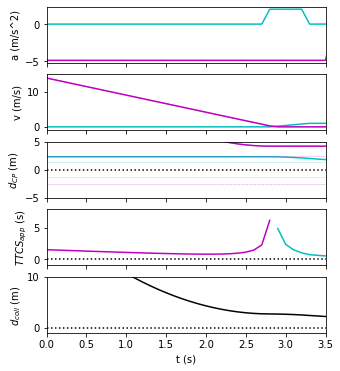

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


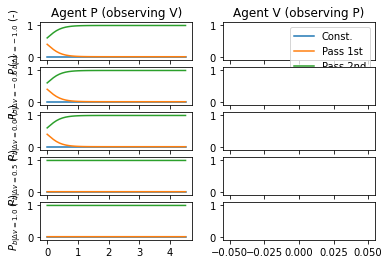

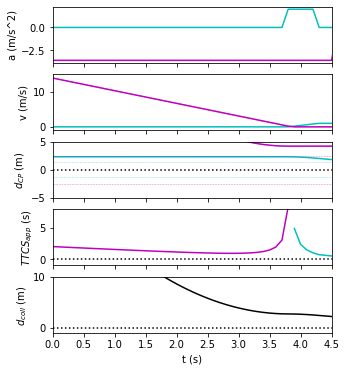

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


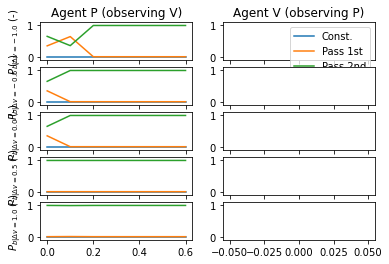

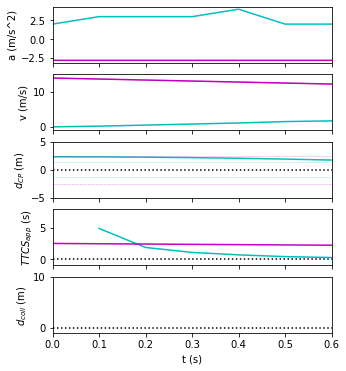

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517

*****************

Plotting model oVAaoVAloBEooBEvoAI with params {'T_delta': 15, 'thetaDot_1': 0.01, 'beta_V': 200, 'T_Of': 10, 'sigma_O': 0.05}:


		Scenario "VehPrioAssert"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


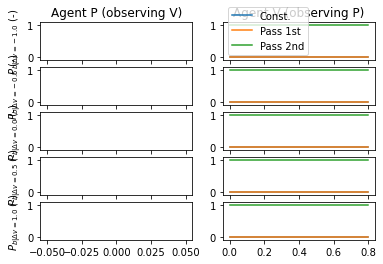

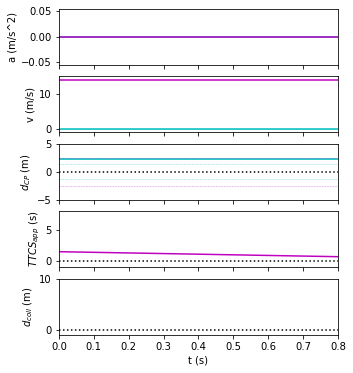

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


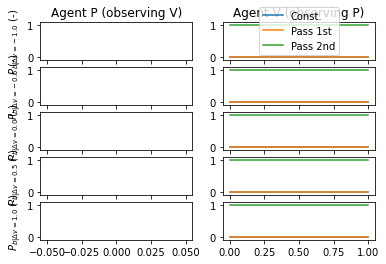

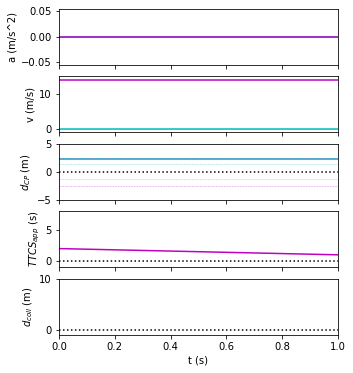

Metric VehPrioAssert_veh_av_speed = 13.88888888888889


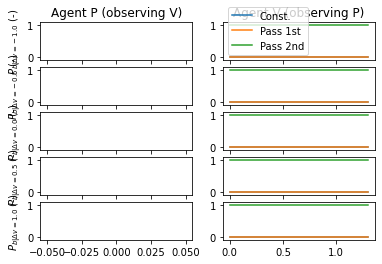

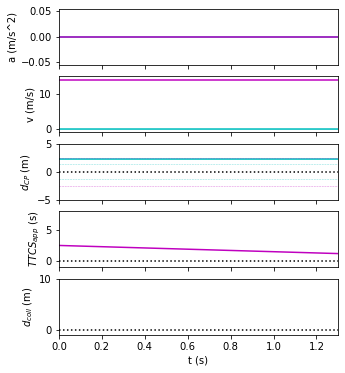

Metric VehPrioAssert_veh_av_speed = 13.888888888888888


		Scenario "VehShortStop"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


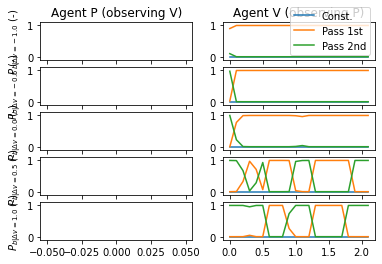

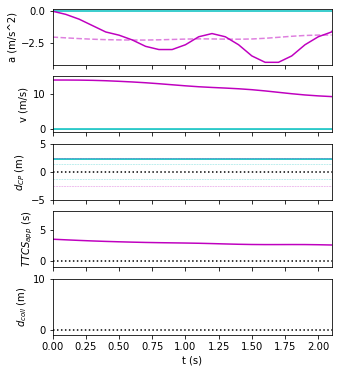

Metric VehShortStop_veh_av_surpl_dec = 0.6465242526424598


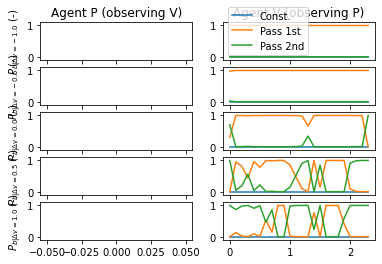

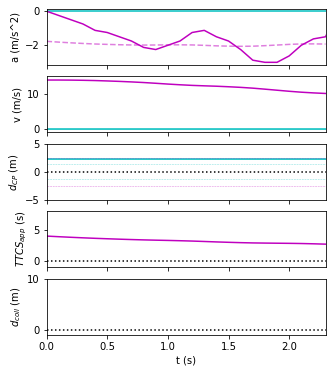

Metric VehShortStop_veh_av_surpl_dec = 0.030930816531345617


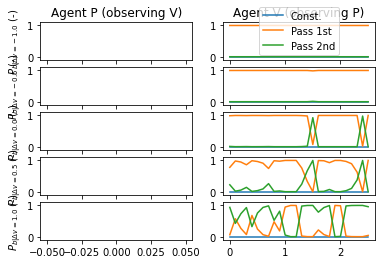

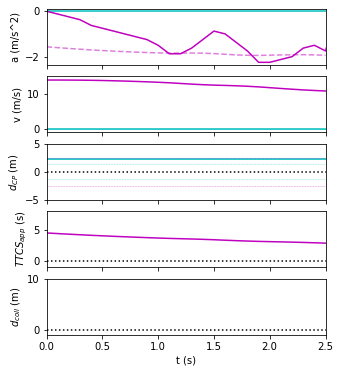

Metric VehShortStop_veh_av_surpl_dec = -0.3387528575740118


		Scenario "PedHesitateVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


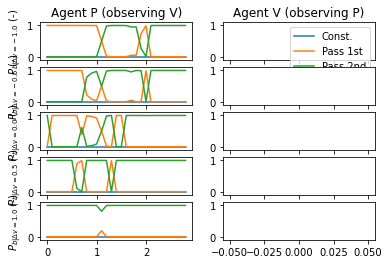

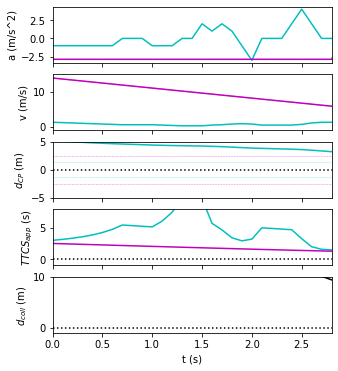

Metric PedHesitateVehYield_ped_av_speed = 0.7107142857142856


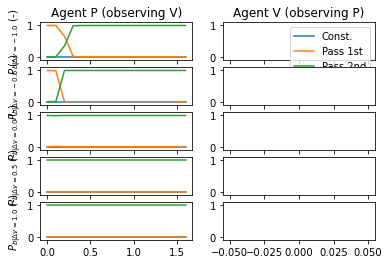

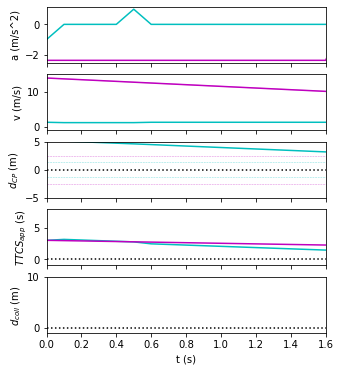

Metric PedHesitateVehYield_ped_av_speed = 1.2687499999999998


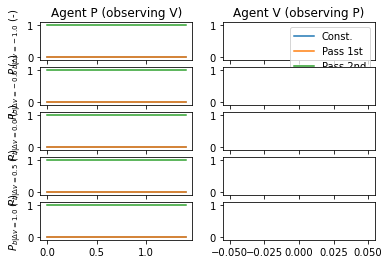

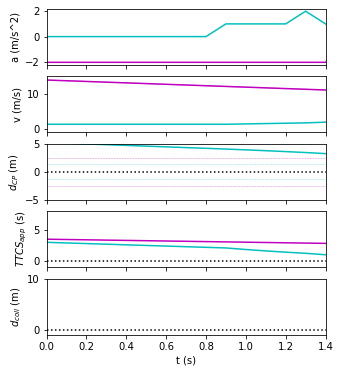

Metric PedHesitateVehYield_ped_av_speed = 1.3714285714285717


		Scenario "PedCrossVehYield"


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


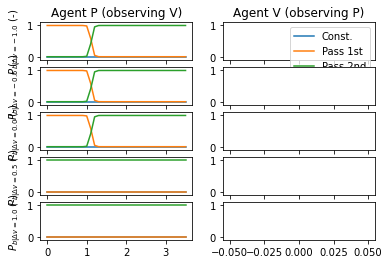

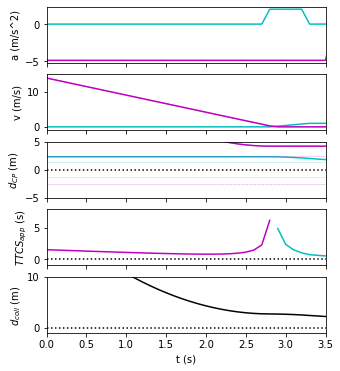

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


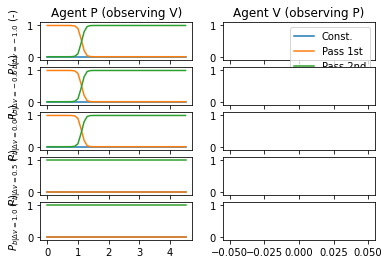

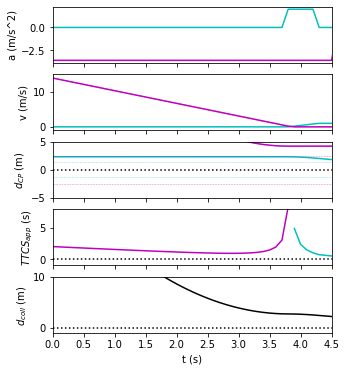

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0


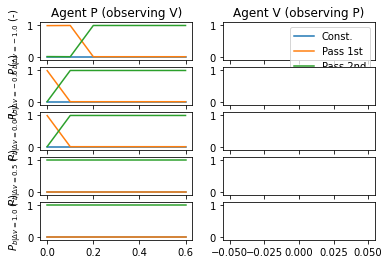

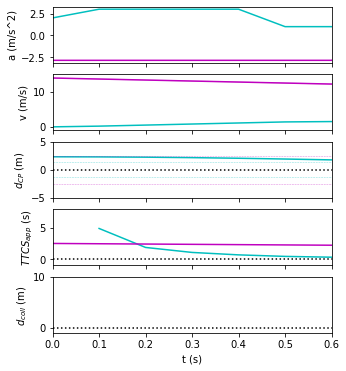

Metric PedCrossVehYield_veh_speed_at_ped_start = 12.172798828482517


In [58]:
simulate_all(det_fit, (40, 0.003, 10, 10, 0.05))
print('\n*****************\n')
simulate_all(det_fit, (15, 0.01, 200, 10, 0.05))